In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import tensorflow as tf
df1 = pd.read_csv("/home/udit/Documents/cognet/train.csv")
X_train=np.array(df1.iloc[:,1:]).T
X_train = X_train/255
#X_train = preprocessing.normalize(X_train)
Y_train = np.array(df1.iloc[:,0])
#Y_train = preprocessing.normalize(Y_train)
df2 = pd.read_csv("/home/udit/Documents/cognet/test.csv")
X_test = np.array(df2.iloc[:,:]).T
X_test = X_test/255
#X_test = preprocessing.normalize(X_test)
Y_test = np.array(df1.iloc[30000:,0])
#print(X_train.shape)
m = Y_train.shape[0]
#print(m)
#Y_train = (Y_train.reshape(m,1))
#Y_test = (Y_test.reshape(Y_test.shape[0],1))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

/home/udit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(784, 42000)
(42000,)
(784, 28000)
(12000,)


In [2]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name='z')

    sigmoid = tf.sigmoid(x)
    sess = tf.Session()
    result = sess.run(sigmoid,feed_dict={x:z})
    sess.close()
    
    return result;

In [3]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [4]:
def one_hot_matrix(labels, C):
    
    C = tf.constant(C,name = 'C')
    
    one_hot_matrix = tf.one_hot(labels,C,axis=1)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
        
    return one_hot;

In [5]:
labels = np.array([1,2,3,0,2,1])

one_hot = one_hot_matrix(labels, C = 10)
#print ("one_hot = " + str(one_hot))
Y_train = one_hot_matrix(Y_train, C = 10)
Y_test = one_hot_matrix(Y_test, C = 10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 42000)
(42000, 10)
(784, 28000)
(12000, 10)


In [6]:
Y_train = Y_train.T
Y_test = Y_test.T
print(Y_train.shape)
print(Y_test.shape)

(10, 42000)
(10, 12000)


In [7]:
def ones(shape):
    
    ones = tf.ones(shape)
    
    sess = tf.Session()
    
    ones = sess.run(ones,feed_dict={})
    
    sess.close()
    
    return ones

In [8]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [9]:
def create_placeholder(n_x,n_y):
    
    X = tf.placeholder(tf.float32,name = 'n_x')
    Y = tf.placeholder(tf.float32,name = 'n_y')
    
    return X,Y

In [10]:
X, Y = create_placeholder(X_train.shape[0],X_train.shape[1])
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("n_x:0", dtype=float32)
Y = Tensor("n_y:0", dtype=float32)


In [11]:
def initialise_parameters():
    W1 = tf.get_variable("W1",[40,784],initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1",[40,1],initializer= tf.zeros_initializer())
    W2 = tf.get_variable("W2",[20,40],initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2",[20,1],initializer= tf.zeros_initializer())
    W3 = tf.get_variable("W3",[10,20],initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3",[10,1],initializer= tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [12]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialise_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(40, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(40, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(20, 40) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(20, 1) dtype=float32_ref>


In [13]:
def forward_prop(X,parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 =tf.add(tf.matmul(W1,X),b1) 
    A1 = tf.nn.relu(Z1)
    Z2 =tf.add(tf.matmul(W2,A1),b2) 
    A2 =tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

In [14]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholder(784, 10)
    parameters = initialise_parameters()
    Z3 = forward_prop(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [15]:
def compute_cost(Z3,Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost;

In [16]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholder(784, 10)
    parameters = initialise_parameters()
    Z3 = forward_prop(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [17]:
def model( X_train, Y_train, X_test, Y_test, learning_rate=0.05, num_of_iterations=1500, print_cost=True):
    
    tf.set_random_seed(1)
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X, Y = tf.placeholder(tf.float32,name="n_x"),tf.placeholder(tf.float32,name="n_y") #X = 784 and Y = 10
    
    parameters = initialise_parameters()  #initialising parameters
    
    Z3 = forward_prop(X,parameters)       #forward prop 
    
    cost = compute_cost(Z3,Y)             #computing cost
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    seed=0
    
    with tf.Session() as sess:
        
        
        sess.run(init)
        
        for i in range(num_of_iterations):

            iter_cost = 0.                       
            num = m
            seed = seed + 1

            (minibatch_X, minibatch_Y) = X_train, Y_train
                
            _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                
            iter_cost += minibatch_cost / num

            if print_cost == True and i % 100 == 0:
                print ("Cost after iteration %i: %f" % (i, iter_cost))
                costs.append(iter_cost)
            if print_cost == True and i % 5 == 0:
                costs.append(iter_cost)
                
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        #print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
    
    

Cost after iteration 0: 0.000056
Cost after iteration 100: 0.000020
Cost after iteration 200: 0.000011
Cost after iteration 300: 0.000009
Cost after iteration 400: 0.000008
Cost after iteration 500: 0.000008
Cost after iteration 600: 0.000007
Cost after iteration 700: 0.000007
Cost after iteration 800: 0.000007
Cost after iteration 900: 0.000006
Cost after iteration 1000: 0.000006
Cost after iteration 1100: 0.000006
Cost after iteration 1200: 0.000006
Cost after iteration 1300: 0.000006
Cost after iteration 1400: 0.000005


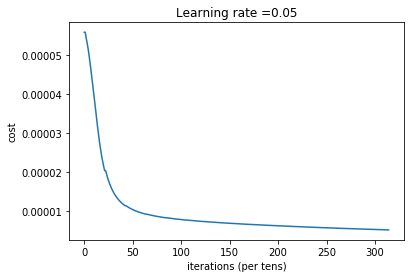

Parameters have been trained!
Train Accuracy: 0.9379762


In [18]:
tf.reset_default_graph()
parameters = model(X_train, Y_train, X_test, Y_test)

In [23]:
X_test, y_pred = create_placeholder(784, 10)
y_pred = forward_prop(X_test, parameters)

with open('/home/udit/Documents/cognet/submission.csv', 'w') as out_file:
    out_file.write('ImageId,Label\n')
    for img_id, guess_label in enumerate(np.argmax(y_pred,1),1):
        out_file.write('%d,%d\n' % (img_id, guess_label))

AxisError: axis 1 is out of bounds for array of dimension 1